# 02. Neural Network classification with PyTorch

## 1. Make classification data and get it ready

In [144]:
import sklearn
from sklearn.datasets import make_circles, make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

In [145]:
# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.3,
                    random_state = 42)

In [146]:
len(X), len(y)

(1000, 1000)

In [147]:
# Visualise
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X:
 [[ 0.59171471  0.43674853]
 [-0.45745002  0.36160118]
 [-1.01069349  0.83042101]
 [-0.87169639  0.41407292]
 [ 0.48803455 -0.87258708]]
First 5 samples of y: [1 1 1 1 0]


In [148]:
# Make a DataFrame of circle data
circles = pd.DataFrame({"X1" : X[:, 0],
                        "X2" : X[:, 1],
                        "label" : y})

circles.head(10)

,X1,X2,label
0,0.591715,0.436749,1
1,-0.457450,0.361601,1
2,-1.010693,0.830421,1
3,-0.871696,0.414073,1
4,0.488035,-0.872587,0
5,-0.347874,1.103071,1
6,-0.046008,0.834056,1
7,0.610994,0.306608,1
8,-0.255312,-0.879601,1
9,0.025255,1.300938,0


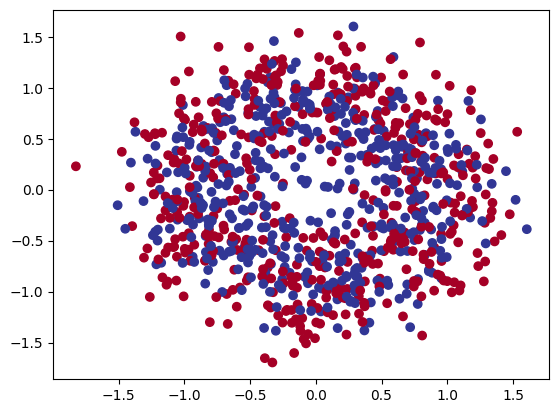

In [149]:
# Visualize
plt.scatter(x = X[:, 0],
            y = X[:, 1],
            c = y,
            cmap = plt.cm.RdYlBu)

**Note:** The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experimetn but still sizeable enough to practise the fundamentals.

### 1.1 Check input and output shapes

In [150]:
X.shape, y.shape

((1000, 2), (1000,))

In [151]:
X

array([[ 0.59171471,  0.43674853],
       [-0.45745002,  0.36160118],
       [-1.01069349,  0.83042101],
       ...,
       [-0.01985814, -1.02765007],
       [ 0.54269168, -1.11429774],
       [ 0.24539316,  1.01154823]])

In [152]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.59171471 0.43674853] and same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test split

In [153]:
type(X), X.dtype
# X data type is float64 and PyTorch accepts float32, it will throw error later if not fixed

(numpy.ndarray, dtype('float64'))

In [154]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.5917,  0.4367],
         [-0.4575,  0.3616],
         [-1.0107,  0.8304],
         [-0.8717,  0.4141],
         [ 0.4880, -0.8726]]),
 tensor([1., 1., 1., 1., 0.]))

In [155]:
type(X), type(y), X.dtype, y.dtype

(torch.Tensor, torch.Tensor, torch.float32, torch.float32)

In [156]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [157]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots

To do so,
* 1. Setup device agnostic code so out code will run on an accelerator (GPU) if there is one
* 2. Construct a mdoel(by subclassing `nn.Module`
* 3. Define a loss function and optimizer
* 4. Create a training and test loop

In [158]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Now we've setup device agnostic code, let's create a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create two `nn.Linear()` layers that are capable of handling the shapes of our data
3. Define a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instantiate an instance of our model class and send it to the target `device`

In [159]:
X_train.shape

torch.Size([800, 2])

In [160]:
y[:5]

tensor([1., 1., 1., 1., 0.])

In [161]:
# 1. Construct a model that subclasses nn.Mudule
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features = 2, out_features = 5)
    self.layer_2 = nn.Linear(in_features = 5, out_features = 1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)
    # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
      return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [162]:
device

'cpu'

In [163]:
next(model_0.parameters()).device

device(type='cpu')

In [164]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5, out_features = 1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [165]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [166]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels: \n{y[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[0.],
        [0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]])

First 10 labels: 
tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.])


In [167]:
X_test[:10], y_test[:10]

(tensor([[-0.2043,  0.5613],
         [ 0.6060,  0.6116],
         [-0.4751, -0.1637],
         [ 0.1429,  1.1769],
         [ 0.1662, -1.3584],
         [ 0.7751, -1.1216],
         [ 1.1489,  0.3940],
         [ 1.1930,  0.2164],
         [-0.5626, -0.9859],
         [-0.0273,  0.7566]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

This is problem specific

For example, for regression you might want `MAE` or `MSE` (Mean Absolute Error or Mean Squared Error)

For classification, you might want `Binary Cross Entropy` or `Categorical Cross Entropy` (Cross Entropy)

As a reminder, the loss function measures how *wrong* your model predictions are.

And for optimizers, two of the most common and useful are `SGD` and `Adam`, however PyTorch has many build-in options.

* For the loss function, we're going to use `torch.nn.BCEWithLogitsLoss()`, for more information, check out PyTorch documentation

In [168]:
# Setup the loss function
#loss_fn = BCELoss() # Requires imputs to have gone through the sigmoid activation function prior to input tp BCELoss
loss_fn = nn.BCEWithLogitsLoss() # It has Sigmoid Activation function built in

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

In [169]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

## 3. Train a model

We have to make a training loop using the following steps

1. Forward pass
2. Calculate the loss
3. Optimize the zero grad
4. Loss backward(backpropagation)
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are goind to be raw **logits**

We can convert these **logits** into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probablities to **prediction labels** by either rounding them or taking the `argmax()`

In [170]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]

y_logits

tensor([[ 0.0073],
        [ 0.0994],
        [ 0.0928],
        [-0.0507],
        [ 0.3683]])

In [171]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [172]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5018],
        [0.5248],
        [0.5232],
        [0.4873],
        [0.5910]])

For our prediction probability values, we need to perform a range-stype rounding on them:
* `y_pred_probs` >= 0.5, `y = 1` (class 1)
* `y_pred_probs` < 0.5, `y = 0` (class 0)

In [173]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In Full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 0., 1.])

### 3.2 Building Training and Testing loop

In [174]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probs -> pred labels

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step(gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # Calculate the loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                      y_pred = test_pred)

  # Print out to visualise
  if epoch  % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss: 5f} | Accuracy: {acc: 5f}% | Test loss: {test_loss: 5f} | Test Accuracy: {test_acc: 5f}%")

Epoch: 0 | Loss:  0.699129 | Accuracy:  53.125000% | Test loss:  0.693821 | Test Accuracy:  53.000000%
Epoch: 10 | Loss:  0.696446 | Accuracy:  52.250000% | Test loss:  0.692517 | Test Accuracy:  53.000000%
Epoch: 20 | Loss:  0.695112 | Accuracy:  51.875000% | Test loss:  0.692105 | Test Accuracy:  51.000000%
Epoch: 30 | Loss:  0.694378 | Accuracy:  50.875000% | Test loss:  0.692037 | Test Accuracy:  52.500000%
Epoch: 40 | Loss:  0.693941 | Accuracy:  51.125000% | Test loss:  0.692107 | Test Accuracy:  52.000000%
Epoch: 50 | Loss:  0.693667 | Accuracy:  51.250000% | Test loss:  0.692234 | Test Accuracy:  49.000000%
Epoch: 60 | Loss:  0.693489 | Accuracy:  50.625000% | Test loss:  0.692378 | Test Accuracy:  49.500000%
Epoch: 70 | Loss:  0.693369 | Accuracy:  50.375000% | Test loss:  0.692524 | Test Accuracy:  50.500000%
Epoch: 80 | Loss:  0.693286 | Accuracy:  49.250000% | Test loss:  0.692662 | Test Accuracy:  55.500000%
Epoch: 90 | Loss:  0.693228 | Accuracy:  51.500000% | Test loss: 

## 4. Make predictions and evaluate the model

From the metrics, it looks like our model isn't learning properly

To inspect our model, make some predictions and make them visual

In [175]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


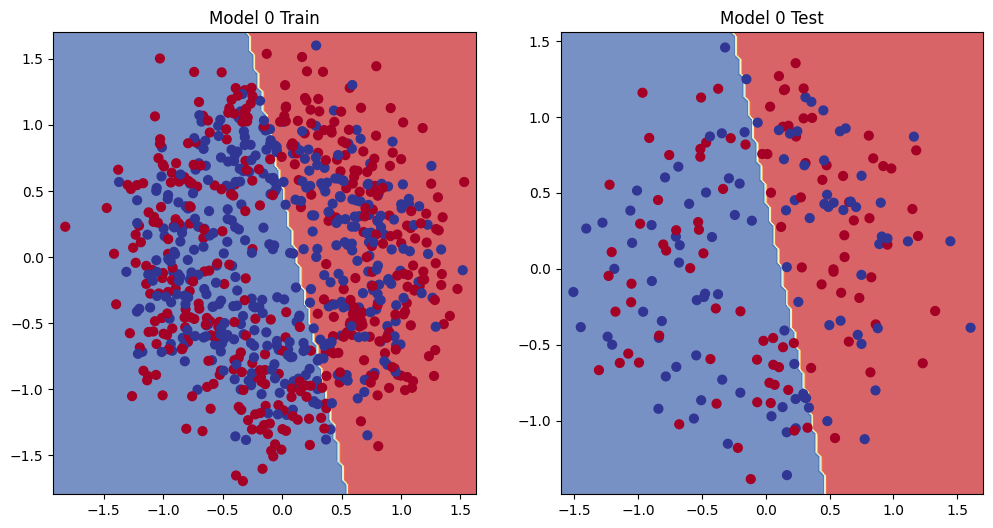

In [176]:
# Plot decision Boundary of the model
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Model 0 Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Model 0 Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model(from a model prespective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 gidden units to 10 hidden units
* Fit for longer
* Changing the activation function
* Change the learning rate
* Change the loss function

These options are all from a model's perspective bacause they deal directly with the model, rather than the data

And because these options are all values we (we machine learning engineers and data scientists) can change, they are referred as **hyperparameters**

Let's try to improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* increase the number of epochs: 100 -> 1000

In [177]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x):
    # The below given code goes like this: x -> self_layer_1 -> z -> self_layer_2 -> z -> self_layer_3 -> return z
    #z = self.layer_1(x)
    #z = self.layer_2(z)
    #z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [178]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Set up a optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

In [179]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put data on the targer device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # 3. Optimize the zero grad
  optimizer.zero_grad()

  # 4. loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():

    # Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # Calculate the loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                          y_pred = test_pred)

  # Print out to visualise
  if epoch  % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss: 5f} | Training Accuracy: {acc: 5f}% | Test loss: {test_loss: 5f} | Test Accuracy: {test_acc: 5f}%")

Epoch: 0 | Loss:  0.693701 | Training Accuracy:  51.125000% | Test loss:  0.693001 | Test Accuracy:  48.500000%
Epoch: 100 | Loss:  0.693008 | Training Accuracy:  50.125000% | Test loss:  0.693877 | Test Accuracy:  50.500000%
Epoch: 200 | Loss:  0.692975 | Training Accuracy:  51.625000% | Test loss:  0.694279 | Test Accuracy:  48.500000%
Epoch: 300 | Loss:  0.692973 | Training Accuracy:  52.250000% | Test loss:  0.694399 | Test Accuracy:  50.000000%
Epoch: 400 | Loss:  0.692973 | Training Accuracy:  52.000000% | Test loss:  0.694433 | Test Accuracy:  49.500000%
Epoch: 500 | Loss:  0.692973 | Training Accuracy:  52.000000% | Test loss:  0.694442 | Test Accuracy:  49.500000%
Epoch: 600 | Loss:  0.692973 | Training Accuracy:  52.000000% | Test loss:  0.694444 | Test Accuracy:  49.500000%
Epoch: 700 | Loss:  0.692973 | Training Accuracy:  52.000000% | Test loss:  0.694445 | Test Accuracy:  49.500000%
Epoch: 800 | Loss:  0.692973 | Training Accuracy:  52.000000% | Test loss:  0.694445 | Tes

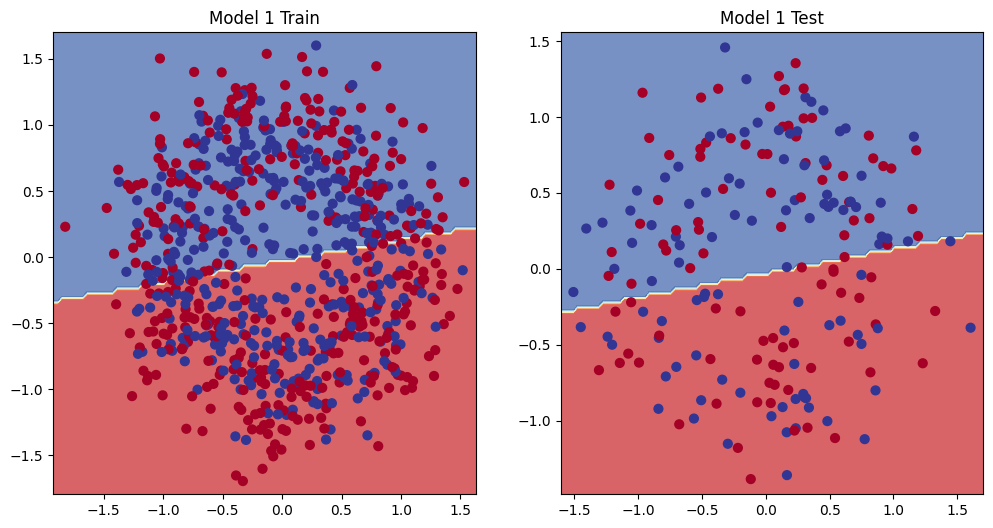

In [180]:
# Plot the decison boundry
# Plot decision Boundary of the model
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Model 1 Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Model 1 Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Prepraring data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem

In [181]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim = 1)
y_regression = weight * X_regression + bias # Linear regression formula(without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [182]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

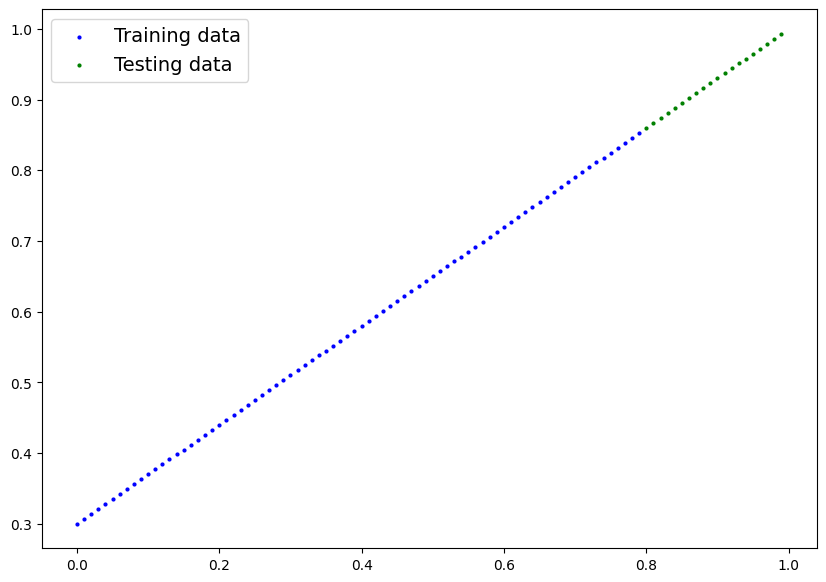

In [183]:
plot_predictions(train_data = X_train_regression,
                 train_labels = y_train_regression,
                 test_data = X_test_regression,
                 test_labels = y_test_regression)

### 5.2 Adjusting `model_1` to fit a straight line

The model_1 has 2 input features as it is a binary classification model but `plot_predictions` works on one input feature as it was for linear data

In [184]:
# Same architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features = 1, out_features = 10),
    nn.Linear(in_features = 10, out_features = 10),
    nn.Linear(in_features = 10, out_features = 1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [185]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.01)

In [186]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set up the number of epochs
epochs = 1000

# Put the data on the target devices
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  model_2.train()

  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print our training
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:5f} | Test Loss: {test_loss:5f}")

Epoch: 0 | Loss: 0.759858 | Test Loss: 0.911029
Epoch: 100 | Loss: 0.028580 | Test Loss: 0.000813
Epoch: 200 | Loss: 0.025325 | Test Loss: 0.002092
Epoch: 300 | Loss: 0.021375 | Test Loss: 0.003051
Epoch: 400 | Loss: 0.019645 | Test Loss: 0.003408
Epoch: 500 | Loss: 0.019402 | Test Loss: 0.003873
Epoch: 600 | Loss: 0.019032 | Test Loss: 0.003789
Epoch: 700 | Loss: 0.018783 | Test Loss: 0.003813
Epoch: 800 | Loss: 0.018397 | Test Loss: 0.003287
Epoch: 900 | Loss: 0.017980 | Test Loss: 0.003604


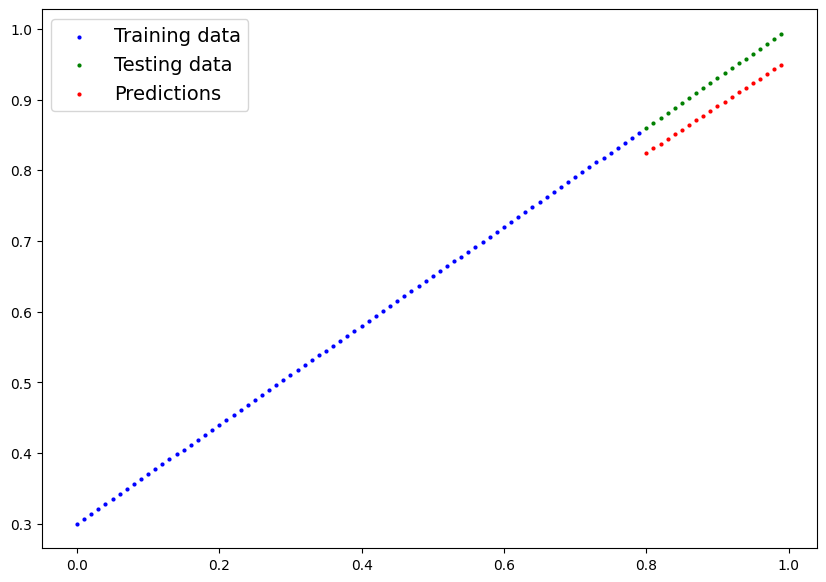

In [187]:
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

plot_predictions(train_data = X_train_regression,
                train_labels = y_train_regression,
                test_data = X_test_regression,
                test_labels = y_test_regression,
                predictions = y_preds)

## 6. The missing piece: non-linearity

"What patterns could yo draw if you were given an infinite amount of straight and non_straight lines?

Or in machine learing terms, an infinite(but really it is finite) of linear and non_linear functions?

### 6.1 Recreating non-Linear data(red and blue circles)

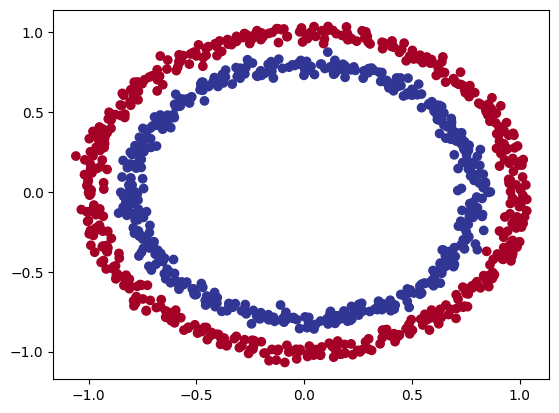

In [188]:
# Make and plot data
n_samples = 1000

X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

In [189]:
# Convert data to tensos and then to train and test splits
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity
* Linear = Straight line
* Non-Linear = non-straight line

Artificial Neural networks are a larger combination of linear (straight) and non-linear (non-straight) functions which are potentially able to find patterns in data.

In [190]:
# Build a model with non-linear activation functions
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU() # relu is non-linear actication function

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [191]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_3.parameters(),
                            lr = 0.1)

### 6.3 Training a model with non-linearity

In [192]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Set up epochs and Training loop
epochs = 1000

for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_preds)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Test
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_preds)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss: 4f} | Accuracy: {acc: 2f}% | Test Loss: {test_loss: 4f} | Test Accuracy: {test_acc: 4f}%")

Epoch: 0 | Loss:  0.692946 | Accuracy:  50.000000% | Test Loss:  0.693188 | Test Accuracy:  50.000000%
Epoch: 100 | Loss:  0.691153 | Accuracy:  52.875000% | Test Loss:  0.691024 | Test Accuracy:  52.500000%
Epoch: 200 | Loss:  0.689774 | Accuracy:  53.375000% | Test Loss:  0.689396 | Test Accuracy:  55.000000%
Epoch: 300 | Loss:  0.687950 | Accuracy:  53.000000% | Test Loss:  0.687232 | Test Accuracy:  56.000000%
Epoch: 400 | Loss:  0.685168 | Accuracy:  52.750000% | Test Loss:  0.684115 | Test Accuracy:  56.500000%
Epoch: 500 | Loss:  0.681022 | Accuracy:  52.750000% | Test Loss:  0.679412 | Test Accuracy:  56.500000%
Epoch: 600 | Loss:  0.675149 | Accuracy:  54.500000% | Test Loss:  0.672851 | Test Accuracy:  56.000000%
Epoch: 700 | Loss:  0.666589 | Accuracy:  58.375000% | Test Loss:  0.663216 | Test Accuracy:  59.000000%
Epoch: 800 | Loss:  0.651595 | Accuracy:  64.000000% | Test Loss:  0.647569 | Test Accuracy:  67.500000%
Epoch: 900 | Loss:  0.623623 | Accuracy:  74.000000% | Te

In [193]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

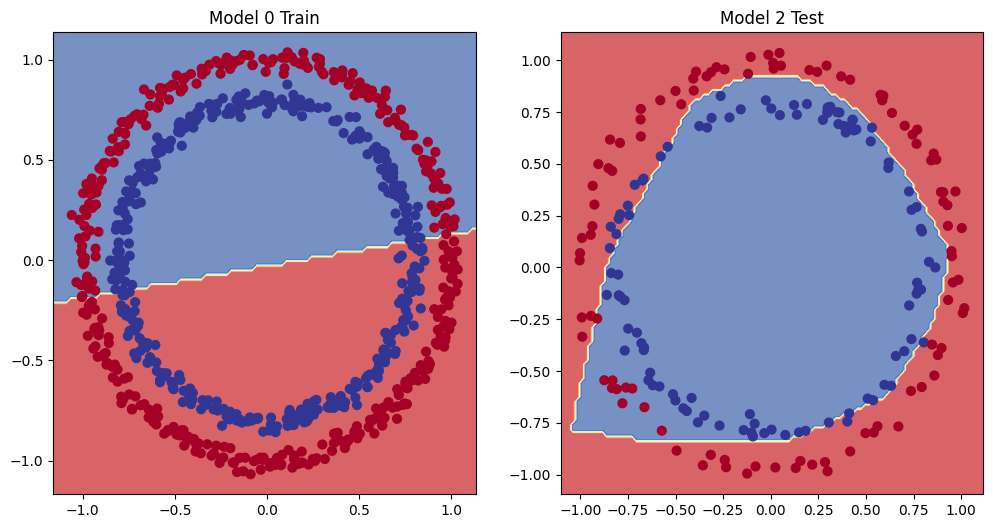

In [194]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Model 0 Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Model 2 Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn we give it the tools to discocer the patterns in data and it tries to figure out the patterns in its own

And these tools are linear and non-linear functions

In [195]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype = torch.float32)
A.dtype

torch.float32

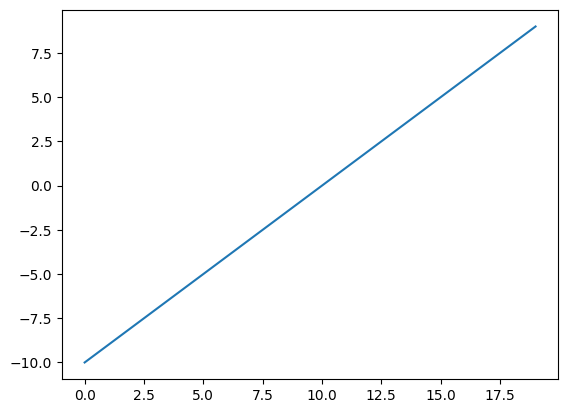

In [196]:
# Visualize the data
plt.plot(A)

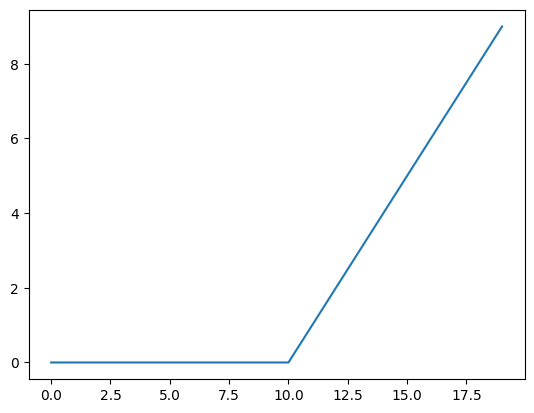

In [197]:
plt.plot(torch.relu(A))

In [198]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

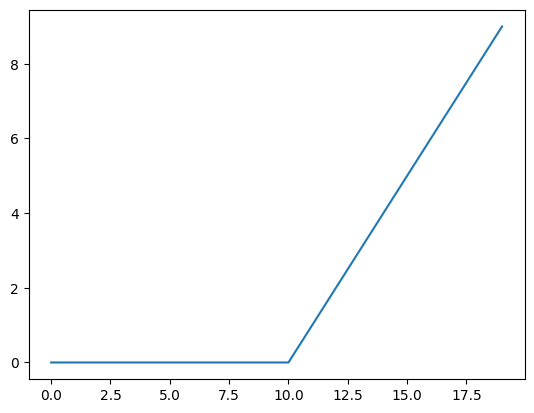

In [199]:
plt.plot(relu(A))

In [200]:
# Let's do the same for sigmoid
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

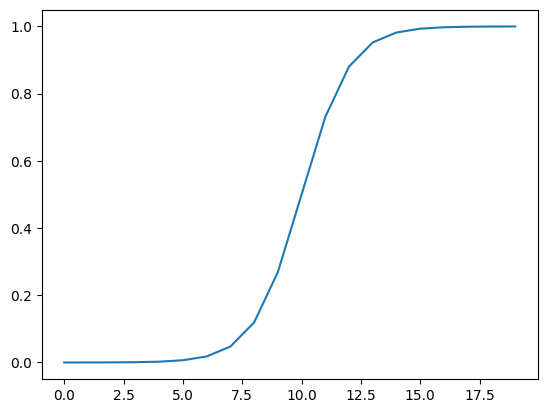

In [201]:
plt.plot(torch.sigmoid(A))

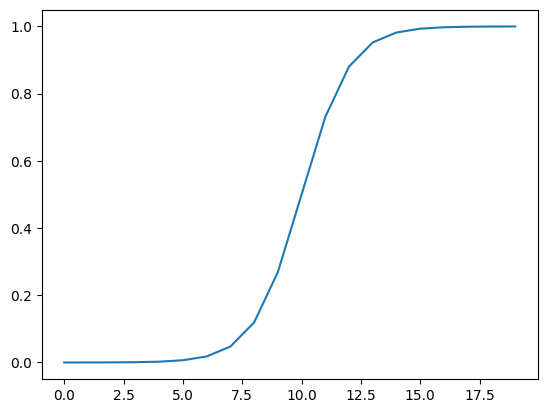

In [202]:
plt.plot(sigmoid(A))

## 8. Putting it all together with multi-class classification problem

* Binary classification = one thing or another (cat vs dog, spam vs not spam, fraud vs not fraud)

* Multi-classs Classification = more than one thing or another (cat vs dog vs chinken)

### 8.1 Creating a toy multi-class dataset

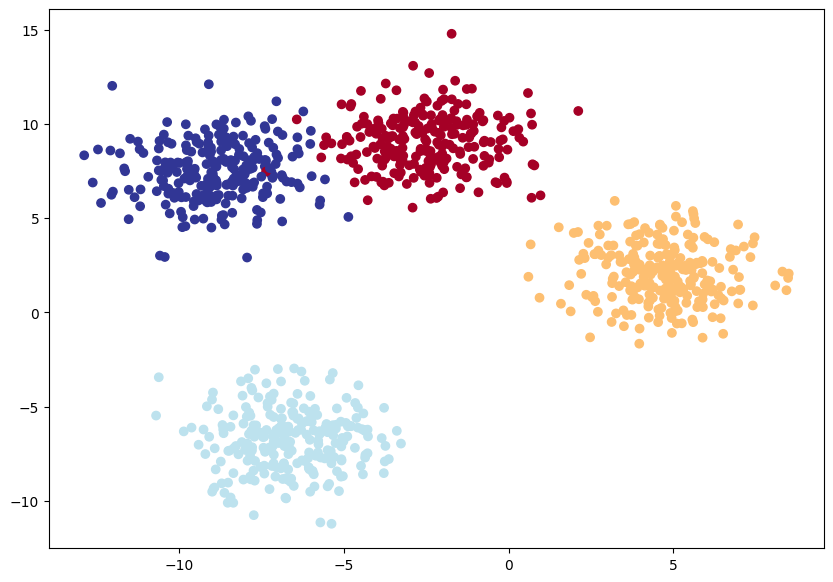

In [203]:
# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create a multi-class data
X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5,
                            random_state = RANDOM_SEED) # Gives the clusters a little shake to include randomness

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split the data into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state = RANDOM_SEED)

# 4. Plot the data, visualize the data
plt.figure(figsize = (10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c = y_blob, cmap = plt.cm.RdYlBu)

### 8.2 Building a multi-class classification model in PyTorch

In [204]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [205]:
# Build a multi-class classification mdoel
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    """ Initializes multi-class classification model.

    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of output features(number of output classes)
      hidden_units (int): Number of hidded units between layers, default 8

    Returns:

    Examples:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features = 2, # Using X_blob_train.shape() shows us that X has 2 features
                    output_features = 4, # These are equal to the number of classes
                    hidden_units = 8).to(device) # We don't have to define hidden_units here but we can for the sake of it
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Create a loss function and optimizer for our multi-class classification model

In [206]:
# Create a loss function for our multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(params = model_4.parameters(),
                            lr = 0.1)

### 8.4 Getting prefictions probabilities for a multi-class PyTorch model

In order to evaluate and train and test our model, we need to convert our model's output (logits) to prediction and then to prediction labels

Logits (raw outputs of the model) -> Pred probs (use `torch.softmax()` for multi-class classification) -> Pred labels (round the pred probs or use `argmax()` function to get prediction labels)

In [207]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [208]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [209]:
# Convert our model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim = 1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [210]:
torch.sum(y_pred_probs[0])

tensor(1.0000)

In [211]:
torch.max(y_pred_probs[0])

tensor(0.3244)

In [212]:
torch.argmax(y_pred_probs[0])

tensor(1)

In [213]:
# Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [214]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Creating a training and testing loop for a multi-class PyTorch model

In [215]:
# Fit the multi-class model to the data
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

# Convert data to device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Set number of epochs
epochs = 100

# Loop through the data
for epoch in range(epochs):
  ### Training
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim = 1)

  loss = loss_fn(y_logits,
                 y_blob_train)
  acc = accuracy_fn(y_true = y_blob_train,
                    y_pred = y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim = 1).argmax(dim = 1)

    test_loss = loss_fn(test_logits,
                        y_blob_test)
    test_acc = accuracy_fn(y_true = y_blob_test,
                           y_pred = test_preds)

  # Print our outputs to visualize
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss: 4f} | Accuracy: {acc: 2f}% | Test Loss: {test_loss: 4f} | Test Accuracy: {test_acc: 2f}%")

Epoch: 0 | Loss:  1.158827 | Accuracy:  40.375000% | Test Loss:  1.075542 | Test Accuracy:  48.000000%
Epoch: 10 | Loss:  0.644755 | Accuracy:  96.750000% | Test Loss:  0.660687 | Test Accuracy:  97.500000%
Epoch: 20 | Loss:  0.425352 | Accuracy:  98.500000% | Test Loss:  0.430741 | Test Accuracy:  100.000000%
Epoch: 30 | Loss:  0.252942 | Accuracy:  99.125000% | Test Loss:  0.245076 | Test Accuracy:  99.500000%
Epoch: 40 | Loss:  0.112322 | Accuracy:  99.250000% | Test Loss:  0.102285 | Test Accuracy:  99.500000%
Epoch: 50 | Loss:  0.066265 | Accuracy:  99.250000% | Test Loss:  0.058475 | Test Accuracy:  99.500000%
Epoch: 60 | Loss:  0.050680 | Accuracy:  99.250000% | Test Loss:  0.042932 | Test Accuracy:  99.500000%
Epoch: 70 | Loss:  0.042997 | Accuracy:  99.250000% | Test Loss:  0.034910 | Test Accuracy:  99.500000%
Epoch: 80 | Loss:  0.038361 | Accuracy:  99.250000% | Test Loss:  0.029878 | Test Accuracy:  99.500000%
Epoch: 90 | Loss:  0.035248 | Accuracy:  99.250000% | Test Loss:

In [216]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]])

In [217]:
# Go from logits -> prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim = 1)
y_pred_probs[:10]

tensor([[1.3438e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5997e-05, 2.7210e-04]])

In [218]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [219]:
# Got from pred probs to pred lables
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [220]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

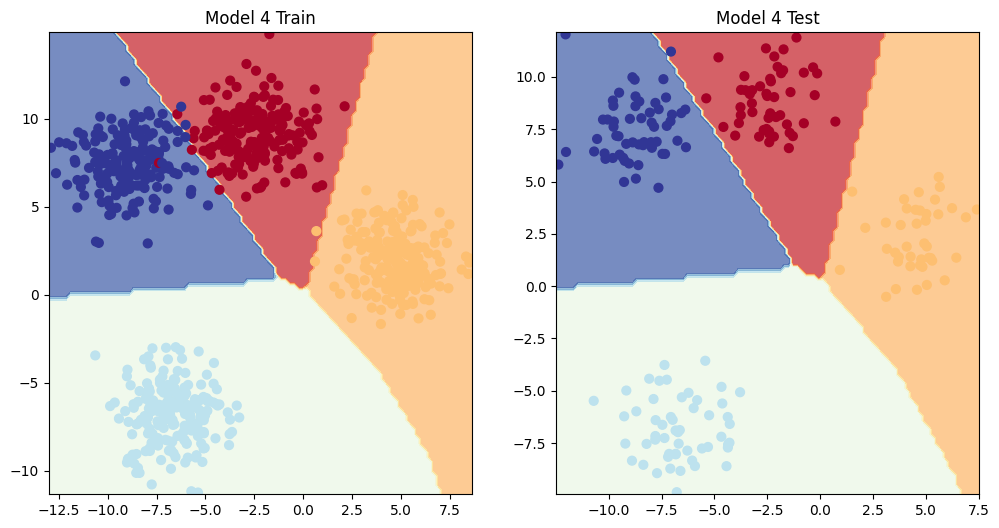

In [221]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Model 4 Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Model 4 Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics.... (to evaluate a classification model)

* Accuracy - out of 100 samples, how many does our model gets right
* Precision  
* Recall
* F1-score
* Confusion matrix
* Classification report

In [222]:
# !pip install torchmetrics

In [223]:
from torchmetrics import Accuracy
# Setup metric
torchmetrics_accuracy = Accuracy(task = "multiclass", num_classes = NUM_CLASSES).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9950)